In [1]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import contextily
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
#osmnx

In [3]:
pioneer_valley = ['Hampshire County, Massachusetts, USA', 'Hampden County, Massachusetts, USA', 'Franklin County, Massachusetts, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
graph = ox.graph_from_place(pioneer_valley, network_type='drive')
area = ox.geocode_to_gdf(pioneer_valley)

In [4]:
basic_stats = ox.stats.basic_stats(graph)

In [5]:
basic_stats

{'n': 27015,
 'm': 70225,
 'k_avg': 5.198963538774755,
 'edge_length_total': 18596507.668999724,
 'edge_length_avg': 264.81320995371624,
 'streets_per_node_avg': 2.7387007218212105,
 'streets_per_node_counts': {0: 0,
  1: 4979,
  2: 138,
  3: 18951,
  4: 2859,
  5: 86,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.18430501573200073,
  2: 0.005108273181565797,
  3: 0.7014991671293725,
  4: 0.10583009439200444,
  5: 0.003183416620396076,
  6: 7.403294466037386e-05},
 'intersection_count': 22036,
 'street_length_total': 9696126.158999939,
 'street_segment_count': 36979,
 'street_length_avg': 262.2062835393044,
 'circuity_avg': 1.0838789220348728,
 'self_loop_proportion': 0.029313934936044783}

In [6]:
nodes_degree = pd.DataFrame(graph.degree, columns=['osmid','degree'])

In [7]:
nodes_degree

osmid  degree
0        61729162       6
1        61729228       2
2        61729236       6
3        61729279       6
4        61729302       6
...           ...     ...
27010  9555222090       6
27011  9581868998       2
27012  9586749013       6
27013  9586749014       6
27014  9587943486       2

[27015 rows x 2 columns]

In [8]:
### Cenpy

In [9]:
spfld_msa_demog = cenpy.products.ACS(2017).from_msa('Springfield, MA', variables=['B01001_001E','B19025A_001E','B01002_001E'])
# B01001: population (total, and by age (gender))
# B19025: income levels
# B01002_001E median age of total pop

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\cenpy\products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


In [10]:
franklin_demog = cenpy.products.ACS(2017).from_msa('Franklin, MA', variables=['B01001_001E','B19025A_001E','B01002_001E'])

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\pandas\core\dtypes\cast.py:1784: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\cenpy\products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


In [11]:
spfld_msa_demog['population_density_psqkm'] = 1000000*spfld_msa_demog['B01001_001E']/spfld_msa_demog.area

In [12]:
spfld_msa_demog.head()

GEOID                                           geometry  \
0  25013812903  POLYGON ((-8104159.120 5180706.160, -8104021.3...   
1  25013813204  POLYGON ((-8093826.220 5170643.730, -8093645.2...   
2  25015821904  POLYGON ((-8085644.130 5209301.410, -8085608.2...   
3  25013800600  POLYGON ((-8083268.680 5180043.770, -8083087.6...   
4  25013800400  POLYGON ((-8081830.320 5180556.810, -8081822.9...   

   B01001_001E  B01002_001E  B19025A_001E  \
0       2876.0         19.8     6927600.0   
1       3304.0         49.2   121718900.0   
2       2541.0         33.6    84963300.0   
3       2717.0         24.8    12492500.0   
4       6221.0         33.2    85492300.0   

                                                NAME state county   tract  \
0  Census Tract 8129.03, Hampden County, Massachu...    25    013  812903   
1  Census Tract 8132.04, Hampden County, Massachu...    25    013  813204   
2  Census Tract 8219.04, Hampshire County, Massac...    25    015  821904   
3   Census Tract 8006, Hampden County, Massachusetts    25    013  800600   
4   Census Tract 8004, Hampden County, Massachusetts    25    013  800400   

   population_density_psqkm  
0               2630.329779  
1                143.924795  
2               1137.470858  
3               1730.690101  
4               1549.078206

In [13]:
franklin_demog['population_density_psqkm'] = 1000000*franklin_demog['B01001_001E']/franklin_demog.area

In [14]:
franklin_demog.head()

GEOID                                           geometry  \
0  25001990000  POLYGON ((-7876371.940 5095895.770, -7876129.4...   
1  25001014800  POLYGON ((-7861459.360 5094878.620, -7861427.9...   
2  25001014402  POLYGON ((-7864011.810 5098657.080, -7864002.0...   
3  25001014600  POLYGON ((-7856217.440 5099917.990, -7856214.1...   
4  25001011801  POLYGON ((-7821718.530 5117436.940, -7821687.8...   

   B01001_001E  B01002_001E  B19025A_001E  \
0          0.0          NaN           NaN   
1       3513.0         61.2   123941300.0   
2       6919.0         45.0   242583900.0   
3       4207.0         51.3   145075900.0   
4       2411.0         67.8   123788400.0   

                                                NAME state county   tract  \
0  Census Tract 9900, Barnstable County, Massachu...    25    001  990000   
1  Census Tract 148, Barnstable County, Massachus...    25    001  014800   
2  Census Tract 144.02, Barnstable County, Massac...    25    001  014402   
3  Census Tract 146, Barnstable County, Massachus...    25    001  014600   
4  Census Tract 118.01, Barnstable County, Massac...    25    001  011801   

   population_density_psqkm  
0                  0.000000  
1                337.277155  
2                 88.983163  
3                171.569847  
4                134.150768

In [15]:
#nodes_degree_geo_df = gpd.GeoDataFrame(graph.degree, columns=['node','degree'])

In [16]:
#nodes_degree_geo_df

In [17]:
#graph = ox.graph_from_place(pioneer_valley, network_type='drive', simplify=False)


In [18]:
#graph = ox.graph_from_place(pioneer_valley, network_type='drive', simplify=False)

In [19]:
pv_demog = pd.concat([spfld_msa_demog, franklin_demog])


In [20]:
pv_demog

GEOID                                           geometry  \
0   25013812903  POLYGON ((-8104159.120 5180706.160, -8104021.3...   
1   25013813204  POLYGON ((-8093826.220 5170643.730, -8093645.2...   
2   25015821904  POLYGON ((-8085644.130 5209301.410, -8085608.2...   
3   25013800600  POLYGON ((-8083268.680 5180043.770, -8083087.6...   
4   25013800400  POLYGON ((-8081830.320 5180556.810, -8081822.9...   
..          ...                                                ...   
52  25001011500  POLYGON ((-7812879.090 5118074.280, -7812863.9...   
53  25001010208  POLYGON ((-7809579.140 5172660.140, -7809459.2...   
54  25001010700  POLYGON ((-7796634.910 5111719.960, -7796632.1...   
55  25001010400  POLYGON ((-7795005.080 5129498.940, -7794955.3...   
56  25001010304  POLYGON ((-7794012.110 5132148.670, -7793572.8...   

    B01001_001E  B01002_001E  B19025A_001E  \
0        2876.0         19.8     6927600.0   
1        3304.0         49.2   121718900.0   
2        2541.0         33.6    84963300.0   
3        2717.0         24.8    12492500.0   
4        6221.0         33.2    85492300.0   
..          ...          ...           ...   
52       3945.0         52.5   113292100.0   
53       1580.0         60.3    49973000.0   
54       3058.0         56.5   194046600.0   
55       3037.0         58.4    98843800.0   
56       2332.0         61.7    95167200.0   

                                                 NAME state county   tract  \
0   Census Tract 8129.03, Hampden County, Massachu...    25    013  812903   
1   Census Tract 8132.04, Hampden County, Massachu...    25    013  813204   
2   Census Tract 8219.04, Hampshire County, Massac...    25    015  821904   
3    Census Tract 8006, Hampden County, Massachusetts    25    013  800600   
4    Census Tract 8004, Hampden County, Massachusetts    25    013  800400   
..                                                ...   ...    ...     ...   
52  Census Tract 115, Barnstable County, Massachus...    25    001  011500   
53  Census Tract 102.08, Barnstable County, Massac...    25    001  010208   
54  Census Tract 107, Barnstable County, Massachus...    25    001  010700   
55  Census Tract 104, Barnstable County, Massachus...    25    001  010400   
56  Census Tract 103.04, Barnstable County, Massac...    25    001  010304   

    population_density_psqkm  
0                2630.329779  
1                 143.924795  
2                1137.470858  
3                1730.690101  
4                1549.078206  
..                       ...  
52                184.678508  
53                 13.260173  
54                 30.324918  
55                 70.175378  
56                 49.432145  

[196 rows x 10 columns]

In [21]:
pv_nodes, pv_streets  = ox.graph_to_gdfs(graph)

In [22]:
pv_nodes.head()

y          x  street_count highway  ref  \
osmid                                                       
61729156  42.079644 -72.887030             2     NaN  NaN   
61729157  42.055242 -72.889788             2     NaN  NaN   
61729158  42.082428 -72.907965             2     NaN  NaN   
61729160  42.060554 -72.970758             2     NaN  NaN   
61729162  42.066328 -72.861139             3     NaN  NaN   

                            geometry  
osmid                                 
61729156  POINT (-72.88703 42.07964)  
61729157  POINT (-72.88979 42.05524)  
61729158  POINT (-72.90797 42.08243)  
61729160  POINT (-72.97076 42.06055)  
61729162  POINT (-72.86114 42.06633)

In [23]:
pv_streets.head()

osmid lanes            name      highway width  \
u        v        key                                                       
61729156 61734462 0      8655778     1  Blandford Road  residential  10.7   
         61730446 0      8655778     1  Blandford Road  residential  10.7   
61729157 61734303 0      8655878     2      South Lane     tertiary   9.8   
         61734077 0      8655878     2      South Lane     tertiary   9.8   
61729158 61734409 0    696773581     1     Wendys Road  residential  15.2   

                       oneway  reversed  length maxspeed  ref bridge access  \
u        v        key                                                         
61729156 61734462 0     False     False  49.536      NaN  NaN    NaN    NaN   
         61730446 0     False      True  45.518      NaN  NaN    NaN    NaN   
61729157 61734303 0     False     False  18.891      NaN  NaN    NaN    NaN   
         61734077 0     False      True  29.594      NaN  NaN    NaN    NaN   
61729158 61734409 0     False     False  22.688   30 mph  NaN    NaN    NaN   

                      junction tunnel  \
u        v        key                   
61729156 61734462 0        NaN    NaN   
         61730446 0        NaN    NaN   
61729157 61734303 0        NaN    NaN   
         61734077 0        NaN    NaN   
61729158 61734409 0        NaN    NaN   

                                                                geometry  
u        v        key                                                     
61729156 61734462 0    LINESTRING (-72.88703 42.07964, -72.88708 42.0...  
         61730446 0    LINESTRING (-72.88703 42.07964, -72.88697 42.0...  
61729157 61734303 0    LINESTRING (-72.88979 42.05524, -72.88975 42.0...  
         61734077 0    LINESTRING (-72.88979 42.05524, -72.88988 42.0...  
61729158 61734409 0    LINESTRING (-72.90797 42.08243, -72.90796 42.0...

In [24]:
pv_nodes.reset_index(inplace=True)

In [25]:
pv_nodes.osmid.unique

<bound method Series.unique of 0           61729156
1           61729157
2           61729158
3           61729160
4           61729162
             ...    
448878    9588825581
448879    9588825582
448880    9588825583
448881    9588825584
448882    9589093234
Name: osmid, Length: 448883, dtype: int64>

In [26]:
merged_pv_nodes = pd.merge(pv_nodes, nodes_degree, on ='osmid')

In [27]:
merged_pv_nodes

osmid          y          x  street_count highway  ref  \
0        61729162  42.066328 -72.861139             3     NaN  NaN   
1        61729228  42.081181 -72.961044             1     NaN  NaN   
2        61729236  42.066242 -72.850392             3     NaN  NaN   
3        61729279  42.088660 -72.894838             3     NaN  NaN   
4        61729302  42.123144 -72.950999             3     NaN  NaN   
...           ...        ...        ...           ...     ...  ...   
27010  9555222090  42.116291 -72.567939             3     NaN  NaN   
27011  9581868998  42.154627 -72.550547             1     NaN  NaN   
27012  9586749013  42.241597 -72.298076             3     NaN  NaN   
27013  9586749014  42.241556 -72.298387             3     NaN  NaN   
27014  9587943486  42.149408 -72.313642             1     NaN  NaN   

                         geometry  degree  
0      POINT (-72.86114 42.06633)       6  
1      POINT (-72.96104 42.08118)       2  
2      POINT (-72.85039 42.06624)       6  
3      POINT (-72.89484 42.08866)       6  
4      POINT (-72.95100 42.12314)       6  
...                           ...     ...  
27010  POINT (-72.56794 42.11629)       6  
27011  POINT (-72.55055 42.15463)       2  
27012  POINT (-72.29808 42.24160)       6  
27013  POINT (-72.29839 42.24156)       6  
27014  POINT (-72.31364 42.14941)       2  

[27015 rows x 8 columns]

In [28]:
merged_pv_nodes = merged_pv_nodes.to_crs(pv_demog.crs)


In [29]:
pv_nodes_demog_joint = merged_pv_nodes.sjoin(pv_demog)

In [30]:
pv_nodes_demog_joint

osmid          y          x  street_count highway  ref  \
0        61729162  42.066328 -72.861139             3     NaN  NaN   
1        61729228  42.081181 -72.961044             1     NaN  NaN   
2        61729236  42.066242 -72.850392             3     NaN  NaN   
3        61729279  42.088660 -72.894838             3     NaN  NaN   
4        61729302  42.123144 -72.950999             3     NaN  NaN   
...           ...        ...        ...           ...     ...  ...   
26815  7530555274  42.290179 -72.420715             3     NaN  NaN   
26887  8481801402  42.259659 -72.449297             1     NaN  NaN   
26938  9035839310  42.290551 -72.418846             3     NaN  NaN   
27003  9550834439  42.318536 -72.435380             3     NaN  NaN   
27004  9550834440  42.318579 -72.435212             3     NaN  NaN   

                               geometry  degree  index_right        GEOID  \
0      POINT (-8110864.914 5170920.181)       6           49  25013813000   
1      POINT (-8121986.266 5173147.732)       2           49  25013813000   
2      POINT (-8109668.519 5170907.360)       6           49  25013813000   
3      POINT (-8114616.248 5174269.548)       6           49  25013813000   
4      POINT (-8120868.062 5179443.704)       6           49  25013813000   
...                                 ...     ...          ...          ...   
26815  POINT (-8061837.083 5204546.374)       6           88  25015820203   
26887  POINT (-8065018.806 5199954.751)       2           88  25015820203   
26938  POINT (-8061629.083 5204602.384)       6           88  25015820203   
27003  POINT (-8063469.662 5208814.636)       6           88  25015820203   
27004  POINT (-8063450.926 5208821.124)       6           88  25015820203   

       B01001_001E  B01002_001E  B19025A_001E  \
0           7246.0         46.4   237961500.0   
1           7246.0         46.4   237961500.0   
2           7246.0         46.4   237961500.0   
3           7246.0         46.4   237961500.0   
4           7246.0         46.4   237961500.0   
...            ...          ...           ...   
26815       8211.0         48.0   315164200.0   
26887       8211.0         48.0   315164200.0   
26938       8211.0         48.0   315164200.0   
27003       8211.0         48.0   315164200.0   
27004       8211.0         48.0   315164200.0   

                                                    NAME state county   tract  \
0       Census Tract 8130, Hampden County, Massachusetts    25    013  813000   
1       Census Tract 8130, Hampden County, Massachusetts    25    013  813000   
2       Census Tract 8130, Hampden County, Massachusetts    25    013  813000   
3       Census Tract 8130, Hampden County, Massachusetts    25    013  813000   
4       Census Tract 8130, Hampden County, Massachusetts    25    013  813000   
...                                                  ...   ...    ...     ...   
26815  Census Tract 8202.03, Hampshire County, Massac...    25    015  820203   
26887  Census Tract 8202.03, Hampshire County, Massac...    25    015  820203   
26938  Census Tract 8202.03, Hampshire County, Massac...    25    015  820203   
27003  Census Tract 8202.03, Hampshire County, Massac...    25    015  820203   
27004  Census Tract 8202.03, Hampshire County, Massac...    25    015  820203   

       population_density_psqkm  
0                      7.698132  
1                      7.698132  
2                      7.698132  
3                      7.698132  
4                      7.698132  
...                         ...  
26815                 86.630668  
26887                 86.630668  
26938                 86.630668  
27003                 86.630668  
27004                 86.630668  

[22381 rows x 18 columns]

In [31]:
pv_nodes_demog_joint.degree.unique()

array([ 6,  2,  4,  8,  1,  3,  5,  7, 10,  9], dtype=int64)

In [32]:
pv_nodes_demog_joint.B19025A_001E.mean()

145110276.87871608

In [33]:
pv_nodes_demog_joint.B19025A_001E.max()

332148600.0

In [34]:
pv_nodes_demog_joint.B19025A_001E.sum()

3245971783500.0

In [35]:
pv_nodes_demog_joint.columns

Index(['osmid', 'y', 'x', 'street_count', 'highway', 'ref', 'geometry',
       'degree', 'index_right', 'GEOID', 'B01001_001E', 'B01002_001E',
       'B19025A_001E', 'NAME', 'state', 'county', 'tract',
       'population_density_psqkm'],
      dtype='object')

In [36]:
# income_weight=(1-(income level/sum of all income levels))
#B19025A_001E

In [37]:
#pv_nodes_demog_joint['income_weight']=1-(pv_nodes_demog_joint.B19025A_001E/pv_nodes_demog_joint.B19025A_001E.sum())

In [38]:
# income_weight=sum of all income levels/income level
#B19025A_001E

In [39]:
pv_nodes_demog_joint['income_weight']=pv_nodes_demog_joint.B19025A_001E.sum()/pv_nodes_demog_joint.B19025A_001E

In [40]:
pv_nodes_demog_joint.income_weight.mean()

44475.64242091137

In [41]:
#pv_nodes_demog_joint['income_weight']=pv_nodes_demog_joint['income_weight']*1000000

In [42]:
#pv_nodes_demog_joint.income_weight.mean()

In [43]:
# population_weight=population/sum of all populations
#B01001_001E

In [44]:
pv_nodes_demog_joint['population_weight']=pv_nodes_demog_joint.population_density_psqkm/pv_nodes_demog_joint.population_density_psqkm.sum()

In [45]:
pv_nodes_demog_joint.population_weight.mean()

4.4680755998391485e-05

In [46]:
#pv_nodes_demog_joint['population_weight']=pv_nodes_demog_joint['population_weight']*10000

In [47]:
#pv_nodes_demog_joint.population_weight.mean()

In [48]:
pv_nodes_demog_joint.degree.mean()

5.225325052499889

In [49]:
pv_nodes_demog_joint['weighted_degree_popden']=pv_nodes_demog_joint['degree']*pv_nodes_demog_joint['population_weight']

In [50]:
pv_nodes_demog_joint['weighted_degree_income']=pv_nodes_demog_joint['degree']*pv_nodes_demog_joint['income_weight']

In [51]:
pv_nodes_demog_joint.weighted_degree_popden.mean()

0.00023701643473585427

In [52]:
pv_nodes_demog_joint.weighted_degree_income.mean()

228242.2465696713

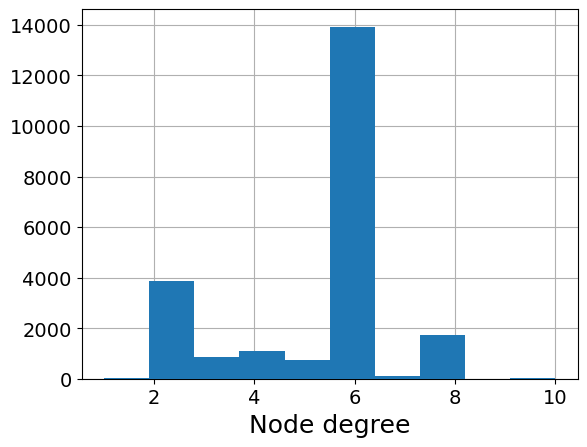

In [53]:
pv_nodes_demog_joint.hist(column='degree', zorder=3)
plt.xlabel('Node degree', fontsize=18)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../figures/pv-nodes-degree.png',dpi=120)

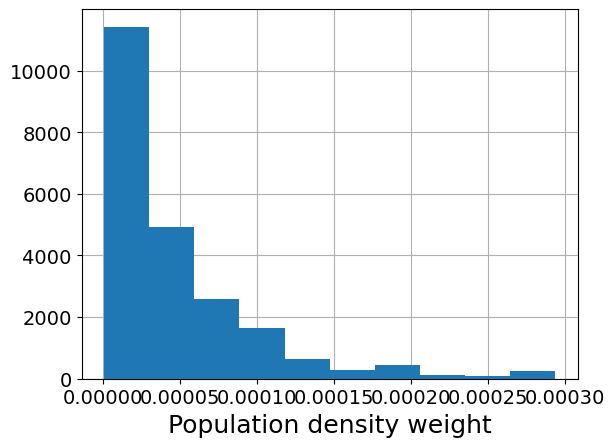

In [54]:
pv_nodes_demog_joint.hist(column='population_weight', zorder=3)
plt.xlabel('Population density weight', fontsize=18)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../figures/popdens-weights.png',dpi=120)

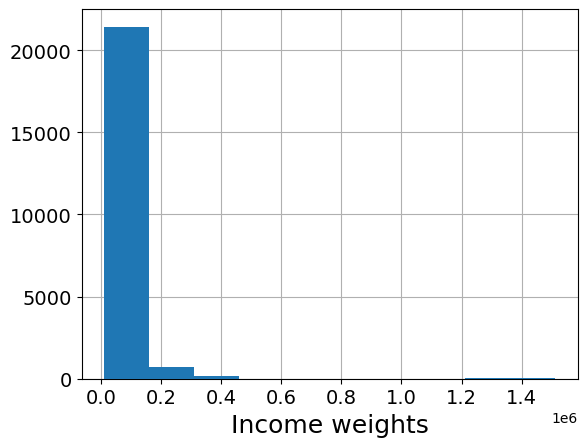

In [55]:
pv_nodes_demog_joint.hist(column='income_weight', zorder=3)
plt.xlabel('Income weights', fontsize=18)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../figures/income-weights.png',dpi=120)

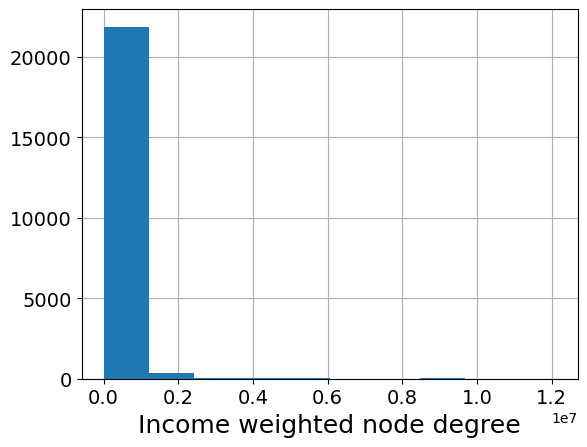

In [56]:
pv_nodes_demog_joint.hist(column='weighted_degree_income', zorder=3)
plt.xlabel('Income weighted node degree', fontsize=18)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../figures/income-weighted-node-degree.png',dpi=120)

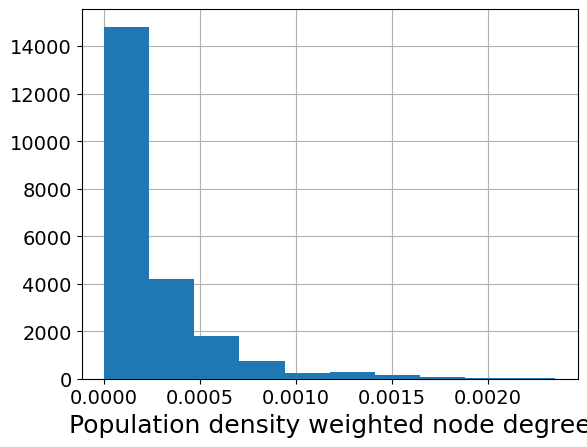

In [57]:
pv_nodes_demog_joint.hist(column='weighted_degree_popden', zorder=3)
plt.xlabel('Population density weighted node degree', fontsize=18)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../figures/popdens-weighted-node-degree.png',dpi=120)

In [58]:
pv_nodes_demog_joint.columns

Index(['osmid', 'y', 'x', 'street_count', 'highway', 'ref', 'geometry',
       'degree', 'index_right', 'GEOID', 'B01001_001E', 'B01002_001E',
       'B19025A_001E', 'NAME', 'state', 'county', 'tract',
       'population_density_psqkm', 'income_weight', 'population_weight',
       'weighted_degree_popden', 'weighted_degree_income'],
      dtype='object')

In [59]:
pv_nodes_demog_joint.weighted_degree_income.mean()

228242.2465696713

In [60]:
pv_nodes_demog_joint.weighted_degree_popden.mean()

0.00023701643473585427

In [61]:
#pv_nodes_demog_joint['weighted_degree_income']=pv_nodes_demog_joint['population_weight']*100000

In [64]:
#pv_demog = pv_demog.to_crs(pv_streets.crs)

In [65]:
pv_nodes_demog_joint.head()

osmid          y          x  street_count highway  ref  \
0  61729162  42.066328 -72.861139             3     NaN  NaN   
1  61729228  42.081181 -72.961044             1     NaN  NaN   
2  61729236  42.066242 -72.850392             3     NaN  NaN   
3  61729279  42.088660 -72.894838             3     NaN  NaN   
4  61729302  42.123144 -72.950999             3     NaN  NaN   

                           geometry  degree  index_right        GEOID  ...  \
0  POINT (-8110864.914 5170920.181)       6           49  25013813000  ...   
1  POINT (-8121986.266 5173147.732)       2           49  25013813000  ...   
2  POINT (-8109668.519 5170907.360)       6           49  25013813000  ...   
3  POINT (-8114616.248 5174269.548)       6           49  25013813000  ...   
4  POINT (-8120868.062 5179443.704)       6           49  25013813000  ...   

   B19025A_001E                                              NAME  state  \
0   237961500.0  Census Tract 8130, Hampden County, Massachusetts     25   
1   237961500.0  Census Tract 8130, Hampden County, Massachusetts     25   
2   237961500.0  Census Tract 8130, Hampden County, Massachusetts     25   
3   237961500.0  Census Tract 8130, Hampden County, Massachusetts     25   
4   237961500.0  Census Tract 8130, Hampden County, Massachusetts     25   

  county   tract population_density_psqkm income_weight  population_weight  \
0    013  813000                 7.698132  13640.743496       6.570577e-07   
1    013  813000                 7.698132  13640.743496       6.570577e-07   
2    013  813000                 7.698132  13640.743496       6.570577e-07   
3    013  813000                 7.698132  13640.743496       6.570577e-07   
4    013  813000                 7.698132  13640.743496       6.570577e-07   

   weighted_degree_popden  weighted_degree_income  
0                0.000004            81844.460978  
1                0.000001            27281.486993  
2                0.000004            81844.460978  
3                0.000004            81844.460978  
4                0.000004            81844.460978  

[5 rows x 22 columns]

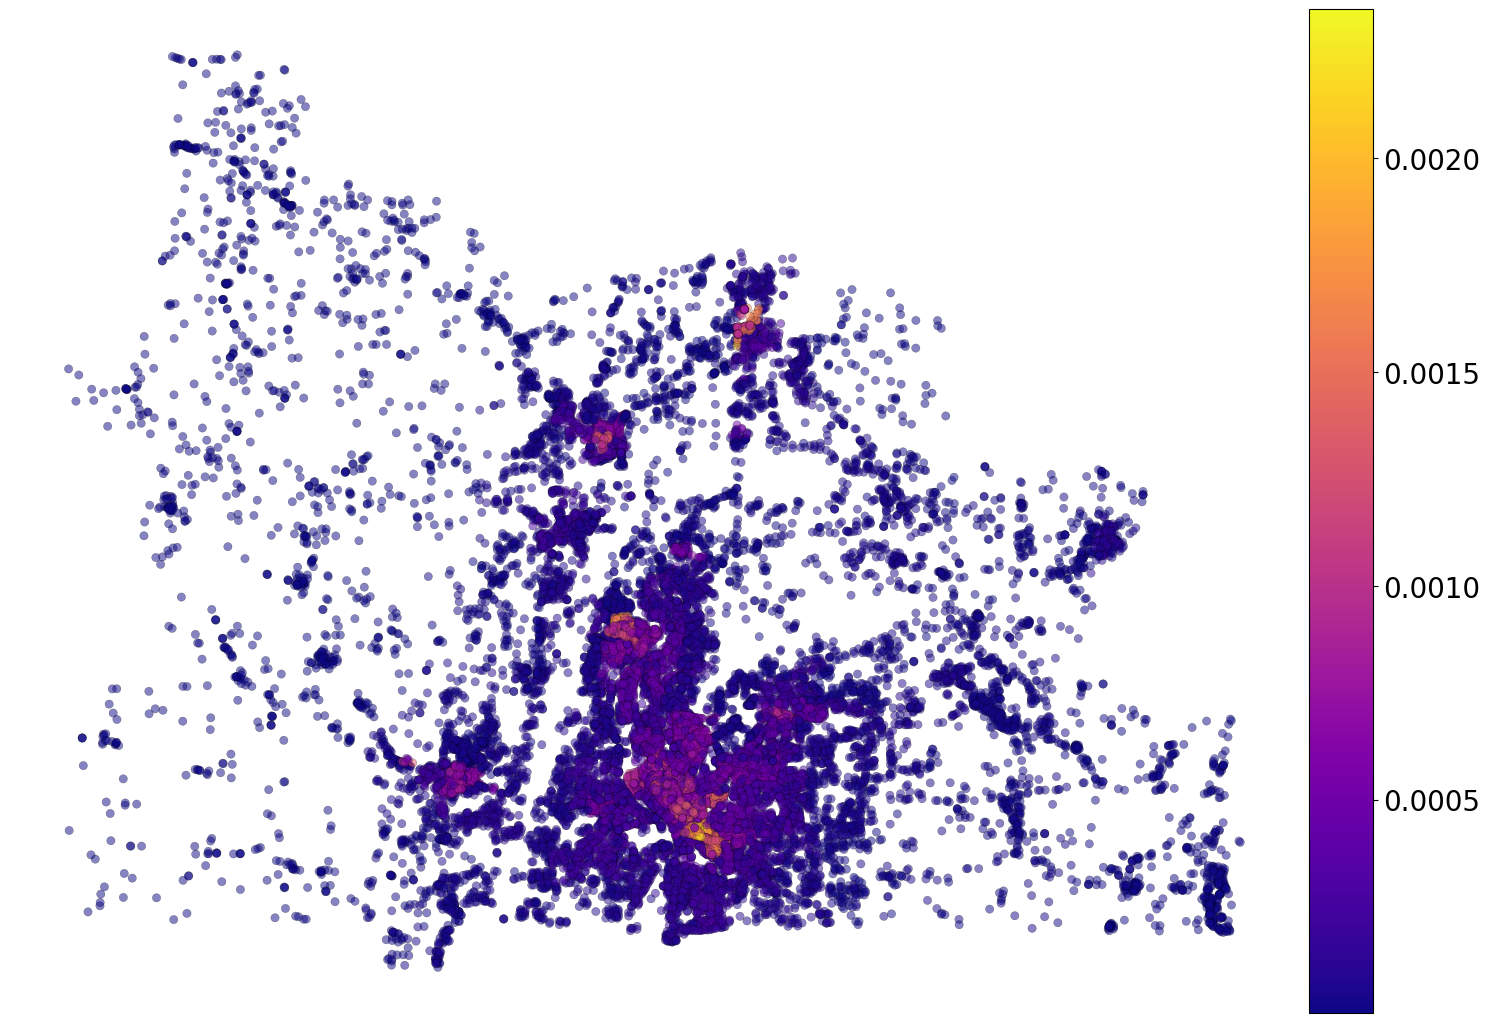

In [63]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
#pv_streets.plot(linewidth=.2, ax=ax, color='k')
pv_nodes_demog_joint.plot('weighted_degree_popden', cmap='plasma', alpha=0.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
ax.axis('off')
cax.tick_params(labelsize='20')
#cax.locator_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-popdens-equity-weighted-node-degree.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

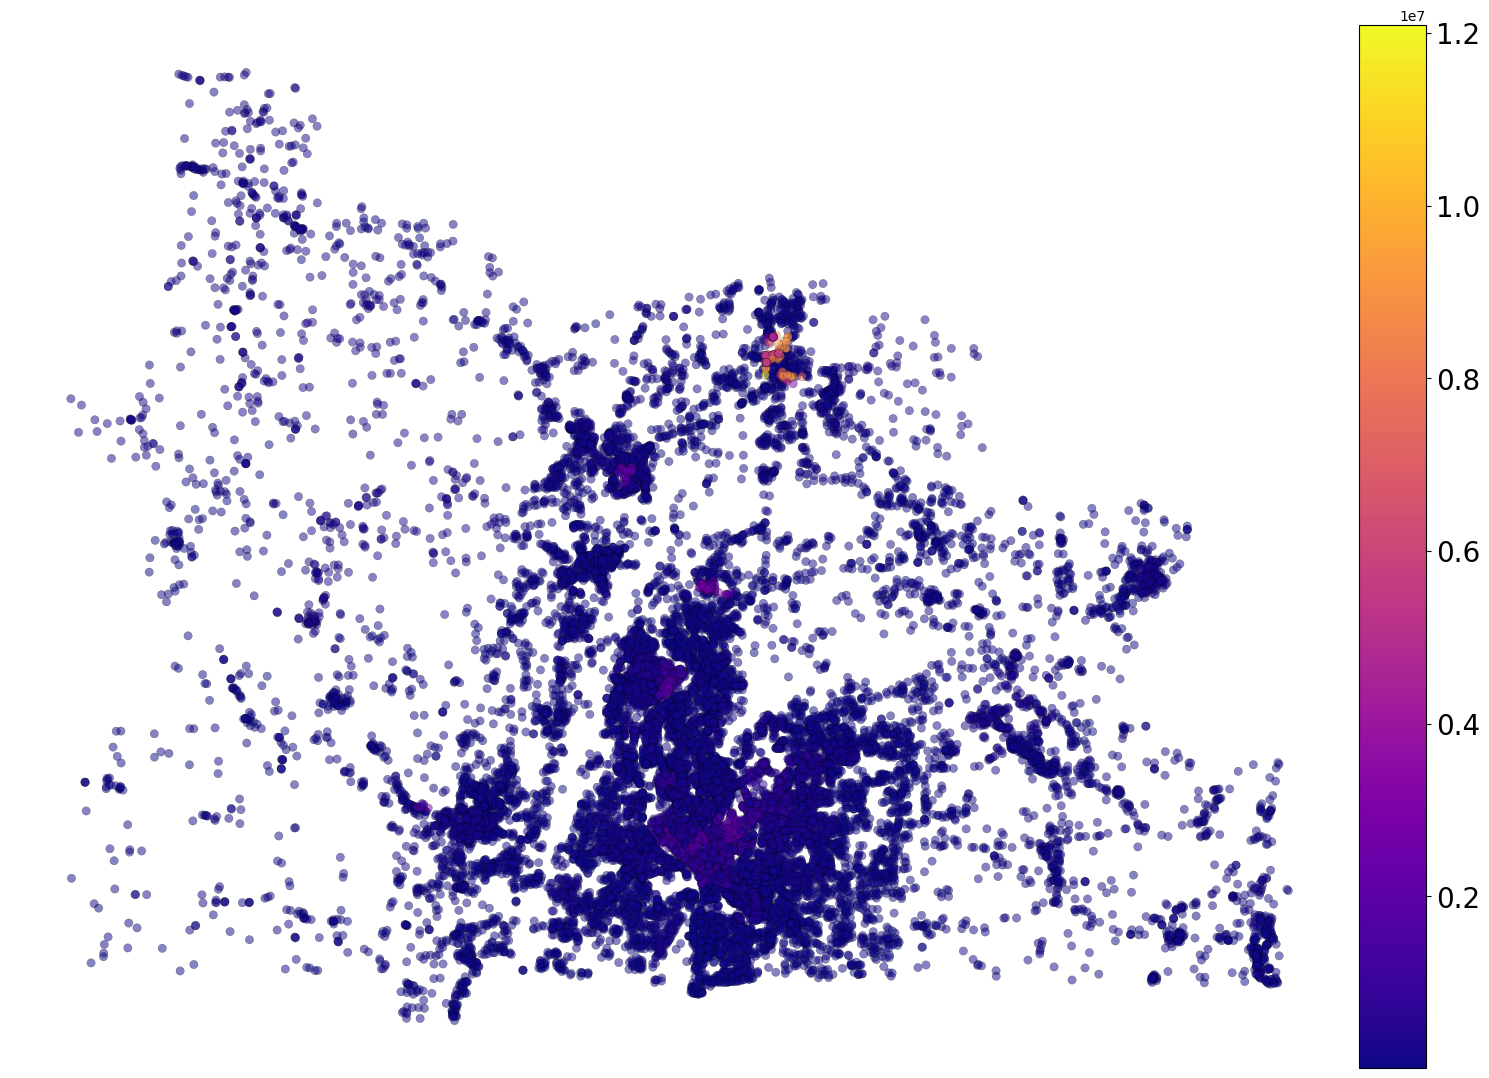

In [66]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
#pv_streets.plot(linewidth=.2, ax=ax, color='k')
pv_nodes_demog_joint.plot('weighted_degree_income', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
ax.axis('off')
cax.tick_params(labelsize='20')
#cax.locator_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-income-equity-weighted-node-degree.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

In [68]:
### eigenvector_centrality

In [69]:
digraph = nx.DiGraph(graph)
centrality = nx.eigenvector_centrality(digraph, max_iter=1000)

In [70]:
nodes_centrality = pd.DataFrame.from_dict(centrality.items())

In [71]:
nodes_centrality=nodes_centrality.rename(columns={0: "osmid", 1: "eigenvector_centrality"})

In [72]:
merged_pv_nodes_centrality = pd.merge(pv_nodes, nodes_centrality, on ='osmid')

In [73]:
merged_pv_nodes_centrality = merged_pv_nodes_centrality.to_crs(pv_demog.crs)

In [74]:
pv_nodes_centrality_demog_joint = merged_pv_nodes_centrality.sjoin(pv_demog)

In [75]:
# income_weight=(1-(income level/sum of all income levels))
#B19025A_001E

In [76]:
pv_nodes_centrality_demog_joint['income_weight']=1-(pv_nodes_centrality_demog_joint.B19025A_001E/pv_nodes_centrality_demog_joint.B19025A_001E.sum())

In [77]:
# population_weight=population/sum of all populations
#B01001_001E

In [78]:
pv_nodes_centrality_demog_joint['population_weight']=pv_nodes_centrality_demog_joint.population_density_psqkm/pv_nodes_centrality_demog_joint.population_density_psqkm.sum()

In [79]:
pv_nodes_centrality_demog_joint['weighted_eigenvector_centrality_popden']=pv_nodes_centrality_demog_joint['eigenvector_centrality']*pv_nodes_centrality_demog_joint['population_weight']

In [80]:
pv_nodes_centrality_demog_joint['weighted_eigenvector_centrality_income']=pv_nodes_centrality_demog_joint['eigenvector_centrality']*pv_nodes_centrality_demog_joint['income_weight']

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]),
 [Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000'),
  Text(0, 300000.0, '300000'),
  Text(0, 350000.0, '350000')])

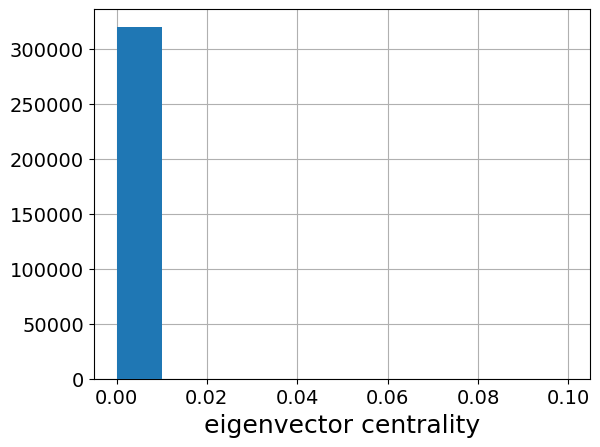

In [81]:
pv_nodes_centrality_demog_joint.hist(column='eigenvector_centrality', zorder=3)#, bins=100
plt.xlabel('eigenvector centrality', fontsize=18)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

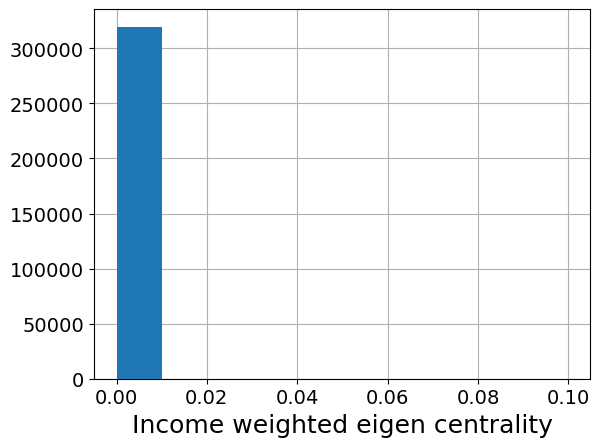

In [82]:
pv_nodes_centrality_demog_joint.hist(column='weighted_eigenvector_centrality_income', zorder=3)
plt.xlabel('Income weighted eigen centrality', fontsize=18)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../figures/income-weighted-eigenvector-centrality.png',dpi=120)

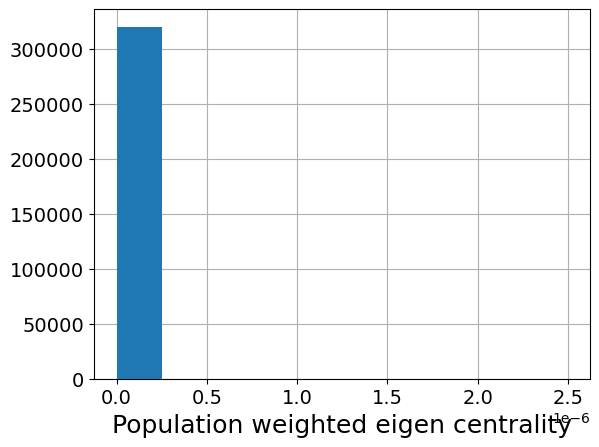

In [83]:
pv_nodes_centrality_demog_joint.hist(column='weighted_eigenvector_centrality_popden', zorder=3)
plt.xlabel('Population weighted eigen centrality', fontsize=18)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../figures/popdens-weighted-eigenvector-centrality.png',dpi=120)

In [84]:
pv_nodes_centrality_demog_joint['eigenvector_centrality'].nlargest(5)

373930    0.099764
379478    0.096848
377860    0.086768
385127    0.078186
367930    0.072841
Name: eigenvector_centrality, dtype: float64

In [85]:
pv_nodes_centrality_demog_joint['eigenvector_centrality'].nsmallest(5)

96449     7.387168e-33
96831     7.387168e-33
97631     7.387168e-33
105747    7.387168e-33
8576      7.387168e-33
Name: eigenvector_centrality, dtype: float64

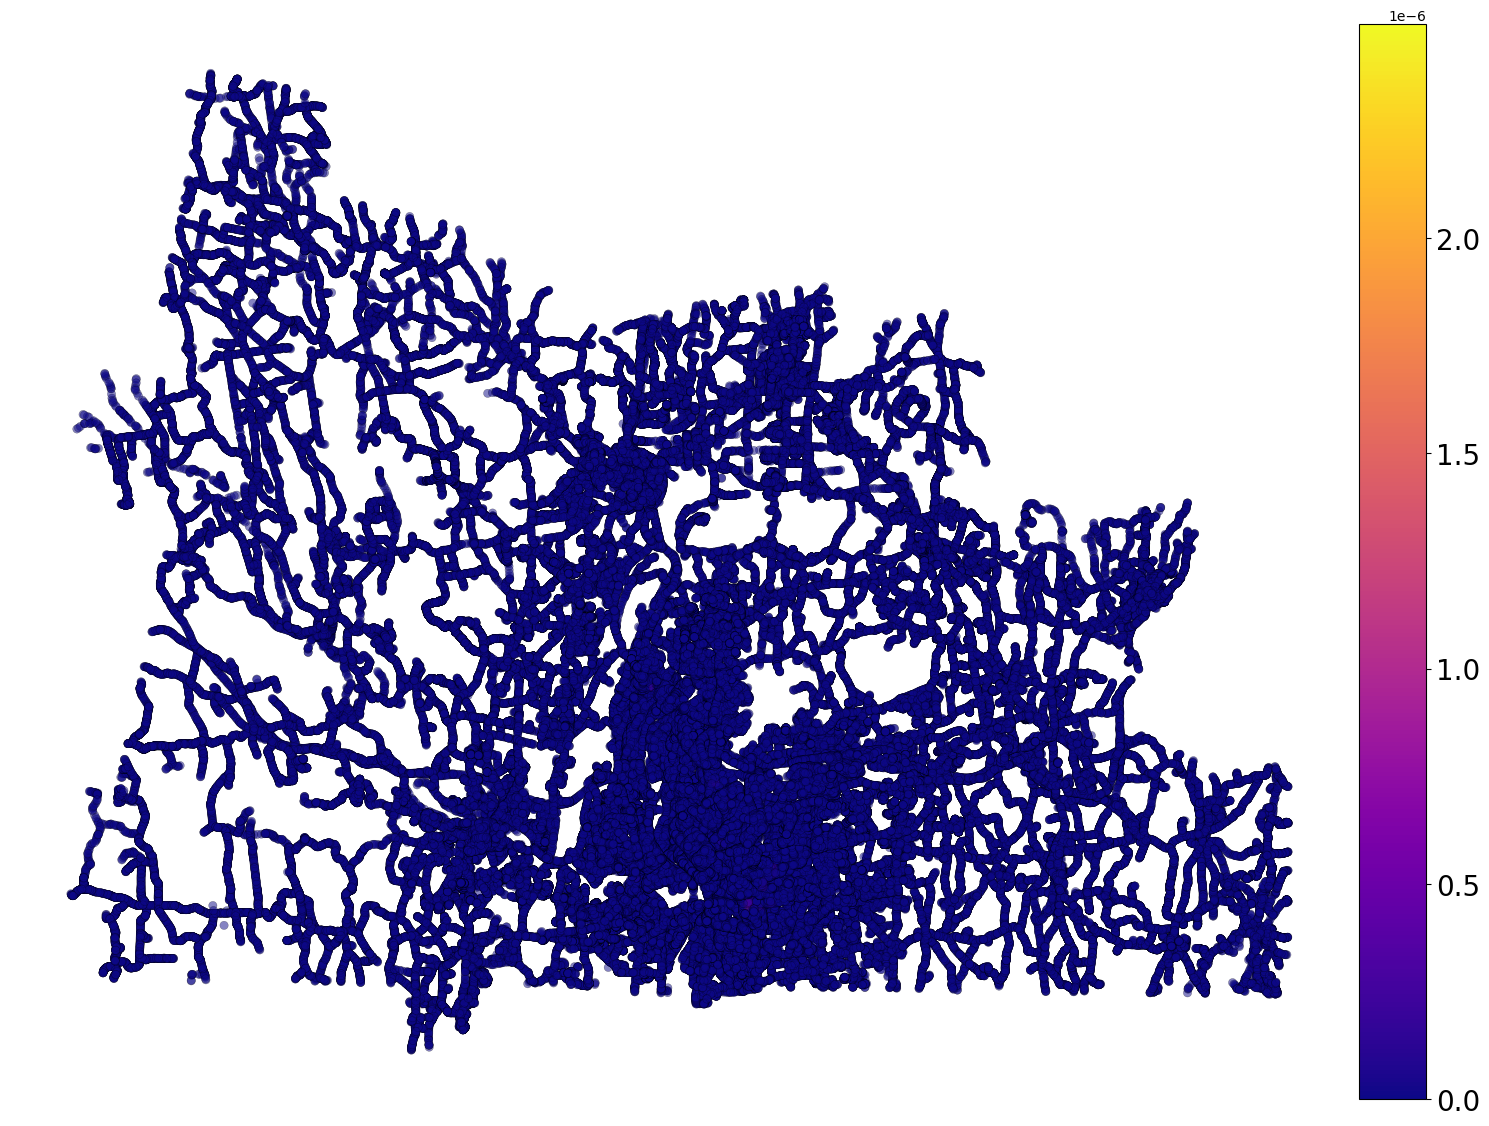

In [86]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
#pv_streets.plot(linewidth=.2, ax=ax, color='k')
pv_nodes_centrality_demog_joint.plot('weighted_eigenvector_centrality_popden', cmap='plasma', alpha=0.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
ax.axis('off')
cax.tick_params(labelsize='20')
#cax.locator_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-income-equity-weighted-eigenvector-centrality.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

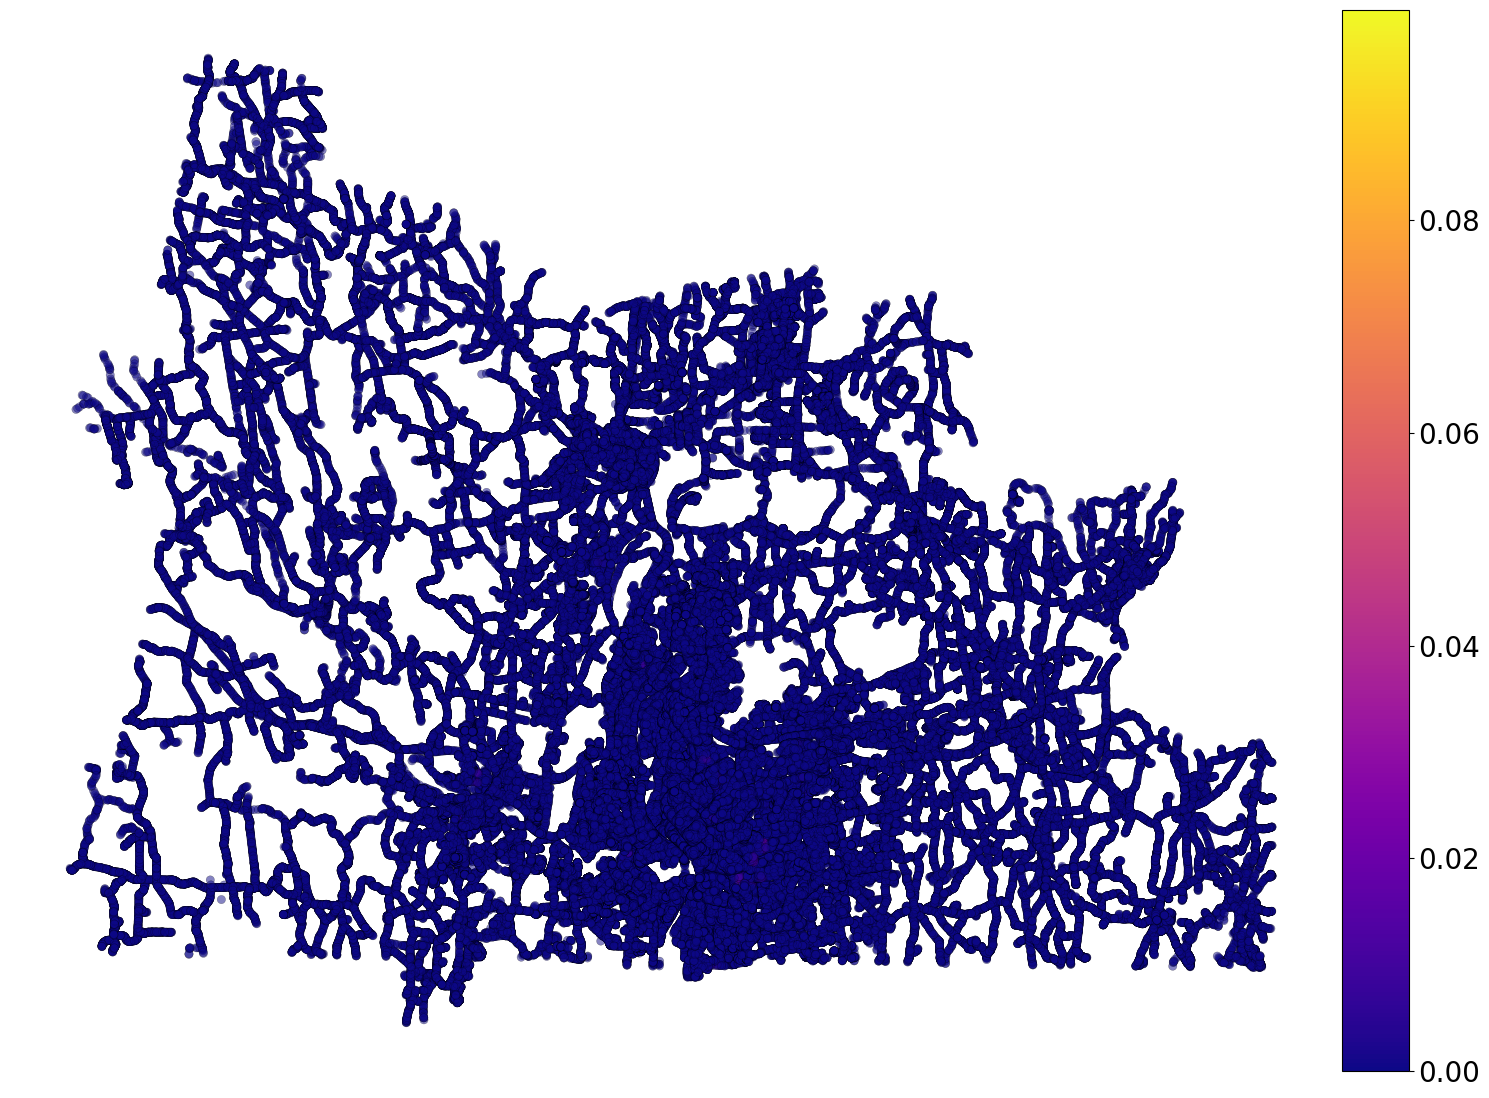

In [87]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
#pv_streets.plot(linewidth=.2, ax=ax, color='k')
pv_nodes_centrality_demog_joint.plot('weighted_eigenvector_centrality_income', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
ax.axis('off')
cax.tick_params(labelsize='20')
#cax.locator_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-income-equity-weighted-centrality-income.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

In [88]:
pv_nodes_demog_joint

osmid          y          x  street_count highway  ref  \
0        61729162  42.066328 -72.861139             3     NaN  NaN   
1        61729228  42.081181 -72.961044             1     NaN  NaN   
2        61729236  42.066242 -72.850392             3     NaN  NaN   
3        61729279  42.088660 -72.894838             3     NaN  NaN   
4        61729302  42.123144 -72.950999             3     NaN  NaN   
...           ...        ...        ...           ...     ...  ...   
26815  7530555274  42.290179 -72.420715             3     NaN  NaN   
26887  8481801402  42.259659 -72.449297             1     NaN  NaN   
26938  9035839310  42.290551 -72.418846             3     NaN  NaN   
27003  9550834439  42.318536 -72.435380             3     NaN  NaN   
27004  9550834440  42.318579 -72.435212             3     NaN  NaN   

                               geometry  degree  index_right        GEOID  \
0      POINT (-8110864.914 5170920.181)       6           72  25013813000   
1      POINT (-8121986.266 5173147.732)       2           72  25013813000   
2      POINT (-8109668.519 5170907.360)       6           72  25013813000   
3      POINT (-8114616.248 5174269.548)       6           72  25013813000   
4      POINT (-8120868.062 5179443.704)       6           72  25013813000   
...                                 ...     ...          ...          ...   
26815  POINT (-8061837.083 5204546.374)       6           93  25015820203   
26887  POINT (-8065018.806 5199954.751)       2           93  25015820203   
26938  POINT (-8061629.083 5204602.384)       6           93  25015820203   
27003  POINT (-8063469.662 5208814.636)       6           93  25015820203   
27004  POINT (-8063450.926 5208821.124)       6           93  25015820203   

       ...  B19025A_001E                                               NAME  \
0      ...   237961500.0   Census Tract 8130, Hampden County, Massachusetts   
1      ...   237961500.0   Census Tract 8130, Hampden County, Massachusetts   
2      ...   237961500.0   Census Tract 8130, Hampden County, Massachusetts   
3      ...   237961500.0   Census Tract 8130, Hampden County, Massachusetts   
4      ...   237961500.0   Census Tract 8130, Hampden County, Massachusetts   
...    ...           ...                                                ...   
26815  ...   315164200.0  Census Tract 8202.03, Hampshire County, Massac...   
26887  ...   315164200.0  Census Tract 8202.03, Hampshire County, Massac...   
26938  ...   315164200.0  Census Tract 8202.03, Hampshire County, Massac...   
27003  ...   315164200.0  Census Tract 8202.03, Hampshire County, Massac...   
27004  ...   315164200.0  Census Tract 8202.03, Hampshire County, Massac...   

       state county   tract population_density_psqkm income_weight  \
0         25    013  813000                 7.698151      0.999927   
1         25    013  813000                 7.698151      0.999927   
2         25    013  813000                 7.698151      0.999927   
3         25    013  813000                 7.698151      0.999927   
4         25    013  813000                 7.698151      0.999927   
...      ...    ...     ...                      ...           ...   
26815     25    015  820203                86.628018      0.999903   
26887     25    015  820203                86.628018      0.999903   
26938     25    015  820203                86.628018      0.999903   
27003     25    015  820203                86.628018      0.999903   
27004     25    015  820203                86.628018      0.999903   

       population_weight  weighted_degree_popden  weighted_degree_income  
0           6.568852e-07                0.000004                5.999560  
1           6.568852e-07                0.000001                1.999853  
2           6.568852e-07                0.000004                5.999560  
3           6.568852e-07                0.000004                5.999560  
4           6.568852e-07                0.000004                5.999560  
...   

In [89]:
pv_nodes_centrality_demog_joint

osmid          y          x  street_count highway  ref  \
0         61729156  42.079644 -72.887030             2     NaN  NaN   
1         61729157  42.055242 -72.889788             2     NaN  NaN   
2         61729158  42.082428 -72.907965             2     NaN  NaN   
3         61729160  42.060554 -72.970758             2     NaN  NaN   
4         61729162  42.066328 -72.861139             3     NaN  NaN   
...            ...        ...        ...           ...     ...  ...   
446247  9052974266  42.255386 -72.577068             2     NaN  NaN   
446248  9052974269  42.255414 -72.577196             2     NaN  NaN   
446822  9055332842  42.253248 -72.571415             2     NaN  NaN   
448397  9085401465  42.255090 -72.576887             2     NaN  NaN   
448398  9085401472  42.255604 -72.578046             2     NaN  NaN   

                                geometry  eigenvector_centrality  index_right  \
0       POINT (-8113747.065 5172917.205)            5.303709e-09           72   
1       POINT (-8114054.084 5169258.023)            8.125665e-09           72   
2       POINT (-8116077.539 5173334.767)            5.421254e-09           72   
3       POINT (-8123067.623 5170054.460)            3.909797e-08           72   
4       POINT (-8110864.914 5170920.181)            2.961475e-07           72   
...                                  ...                     ...          ...   
446247  POINT (-8079242.298 5199312.144)            3.943810e-07           42   
446248  POINT (-8079256.457 5199316.265)            3.077825e-07           42   
446822  POINT (-8078612.997 5198990.654)            3.802130e-08           42   
448397  POINT (-8079222.049 5199267.550)            9.514208e-07           42   
448398  POINT (-8079351.101 5199344.901)            4.417285e-07           42   

              GEOID  ...  B19025A_001E  \
0       25013813000  ...   237961500.0   
1       25013813000  ...   237961500.0   
2       25013813000  ...   237961500.0   
3       25013813000  ...   237961500.0   
4       25013813000  ...   237961500.0   
...             ...  ...           ...   
446247  25015821200  ...     7440500.0   
446248  25015821200  ...     7440500.0   
446822  25015821200  ...     7440500.0   
448397  25015821200  ...     7440500.0   
448398  25015821200  ...     7440500.0   

                                                     NAME  state county  \
0        Census Tract 8130, Hampden County, Massachusetts     25    013   
1        Census Tract 8130, Hampden County, Massachusetts     25    013   
2        Census Tract 8130, Hampden County, Massachusetts     25    013   
3        Census Tract 8130, Hampden County, Massachusetts     25    013   
4        Census Tract 8130, Hampden County, Massachusetts     25    013   
...                                                   ...    ...    ...   
446247  Census Tract 8212, Hampshire County, Massachus...     25    015   
446248  Census Tract 8212, Hampshire County, Massachus...     25    015   
446822  Census Tract 8212, Hampshire County, Massachus...     25    015   
448397  Census Tract 8212, Hampshire County, Massachus...     25    015   
448398  Census Tract 8212, Hampshire County, Massachus...     25    015   

         tract population_density_psqkm income_weight  population_weight  \
0       813000                 7.698151      0.999995       8.072314e-08   
1       813000                 7.698151      0.999995       8.072314e-08   
2       813000                 7.698151      0.999995       8.072314e-08   
3       813000                 7.698151      0.999995       8.072314e-08   
4       813000                 7.698151      0.999995       8.072314e-08   
...        ...                      ...           ...                ...   
446247  821200              1052.850844      1.000000       1.104024e-05   
446248  821200              1052.850844      1.000000       1.104024e-05   
446822  821200              1052.850844      1.000000       1.104024e-05   
448397  821200       

<AxesSubplot: xlabel='population_weight', ylabel='weighted_degree_popden'>

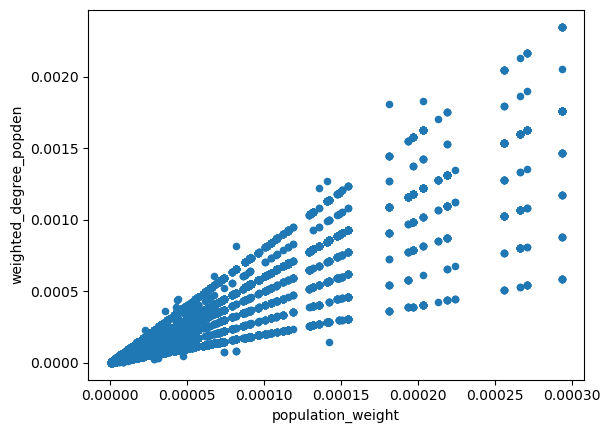

In [90]:
pv_nodes_demog_joint.plot(x='population_weight',y='weighted_degree_popden', kind='scatter')

<AxesSubplot: xlabel='income_weight', ylabel='weighted_degree_income'>

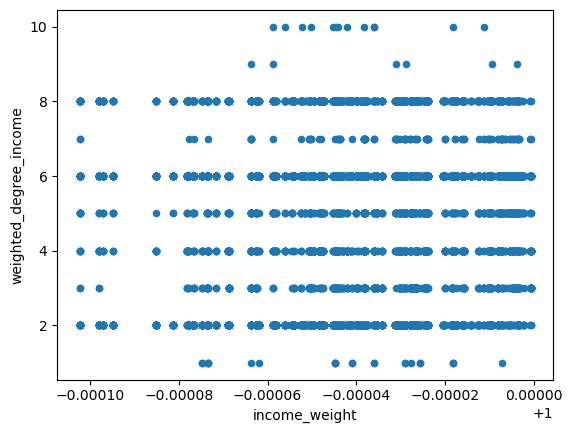

In [91]:
pv_nodes_demog_joint.plot(x='income_weight',y='weighted_degree_income', kind='scatter')

<AxesSubplot: xlabel='population_density_psqkm', ylabel='weighted_eigenvector_centrality_popden'>

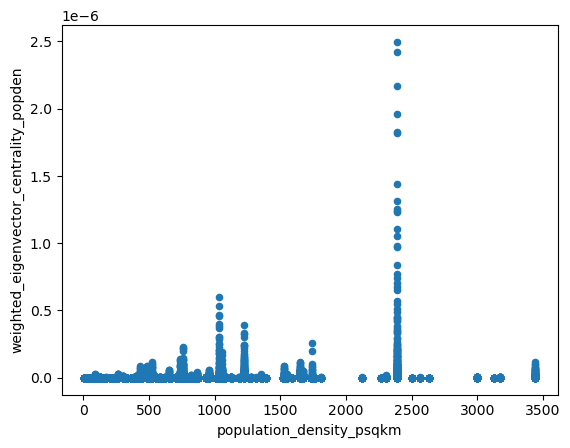

In [92]:
pv_nodes_centrality_demog_joint.plot(x='population_density_psqkm',y='weighted_eigenvector_centrality_popden', kind='scatter')

<AxesSubplot: xlabel='income_weight', ylabel='weighted_eigenvector_centrality_income'>

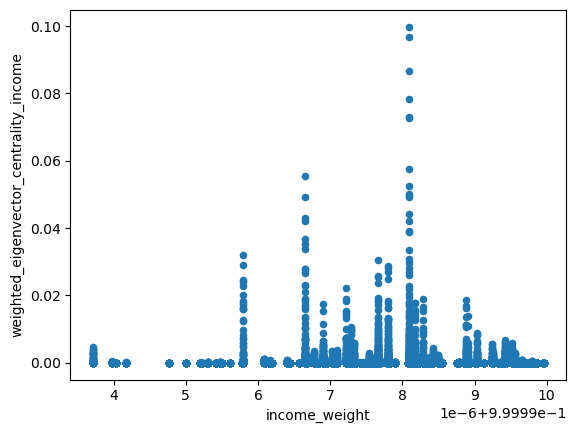

In [93]:
pv_nodes_centrality_demog_joint.plot(x='income_weight',y='weighted_eigenvector_centrality_income', kind='scatter')

In [94]:
#primal = momepy.closeness_centrality(primal, name='closeness_global', weight='mm_len')

In [95]:
pv_nodes_demog_joint.population_weight.sum()

1.0

In [96]:
pv_nodes_demog_joint.income_weight.sum()

22365.0

In [97]:
pv_nodes_centrality_demog_joint.population_weight.sum()

0.9999999999999999

In [98]:
pv_nodes_centrality_demog_joint.income_weight.sum()

319783.99999999994

In [99]:
pv_nodes_demog_joint.income_weight.min()

0.9998976220616848

In [100]:
pv_nodes_centrality_demog_joint.columns

Index(['osmid', 'y', 'x', 'street_count', 'highway', 'ref', 'geometry',
       'eigenvector_centrality', 'index_right', 'GEOID', 'B01001_001E',
       'B01002_001E', 'B19025A_001E', 'NAME', 'state', 'county', 'tract',
       'population_density_psqkm', 'income_weight', 'population_weight',
       'weighted_eigenvector_centrality_popden',
       'weighted_eigenvector_centrality_income'],
      dtype='object')

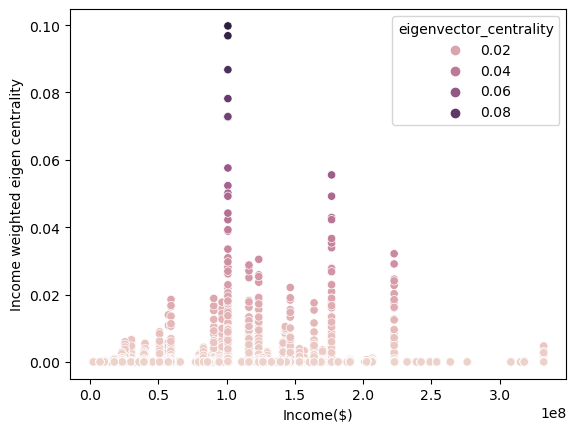

In [101]:
hues=pv_nodes_centrality_demog_joint['eigenvector_centrality']

fig = sns.scatterplot(data=pv_nodes_centrality_demog_joint, x='B19025A_001E', y='weighted_eigenvector_centrality_income', hue=hues) #size=sizes,
fig.set(xlabel='Income($)', ylabel='Income weighted eigen centrality')
plt.show()

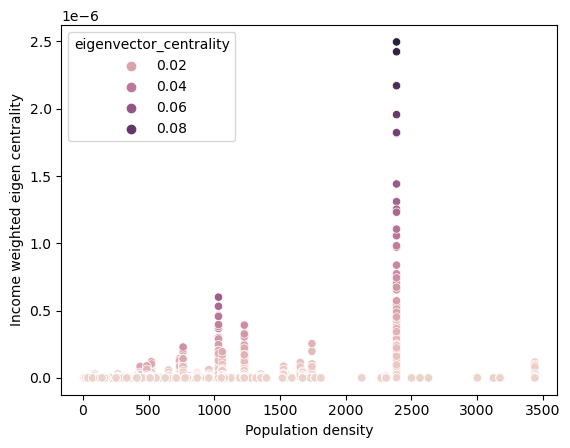

In [102]:
hues=pv_nodes_centrality_demog_joint['eigenvector_centrality']

fig = sns.scatterplot(data=pv_nodes_centrality_demog_joint, x='population_density_psqkm', y='weighted_eigenvector_centrality_popden', hue=hues) #size=sizes,
fig.set(xlabel='Population density', ylabel='Income weighted eigen centrality')
plt.show()

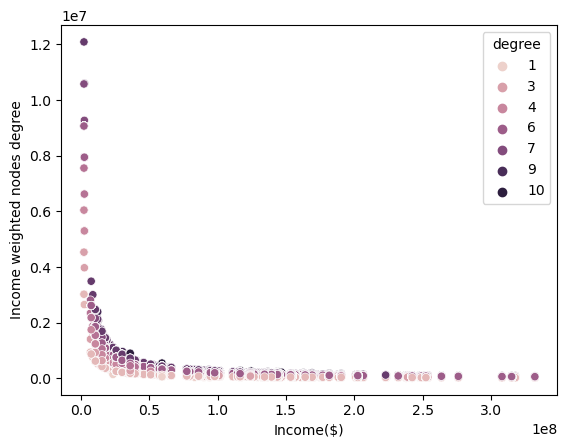

In [172]:
hues=pv_nodes_demog_joint['degree']

fig = sns.scatterplot(data=pv_nodes_demog_joint, x='B19025A_001E', y='weighted_degree_income', hue=hues) #size=sizes,
fig.set(xlabel='Income($)', ylabel='Income weighted nodes degree')
plt.show()

In [173]:
# Log transformation of population_density_psqkm
pv_nodes_demog_joint['log_weighted_degree_income']=np.log(pv_nodes_demog_joint['weighted_degree_income'])

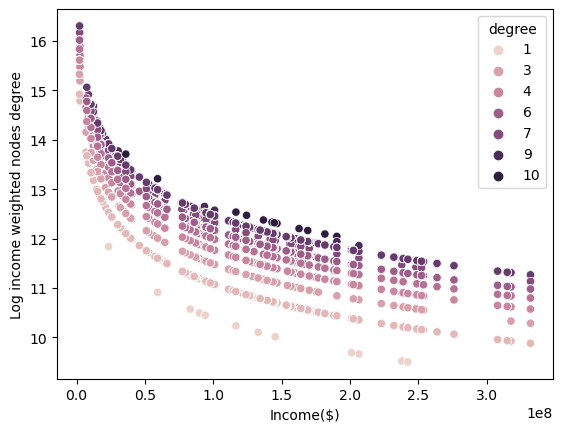

In [174]:
hues=pv_nodes_demog_joint['degree']

fig = sns.scatterplot(data=pv_nodes_demog_joint, x='B19025A_001E', y='log_weighted_degree_income', hue=hues) #size=sizes,
fig.set(xlabel='Income($)', ylabel='Log income weighted nodes degree')
plt.show()

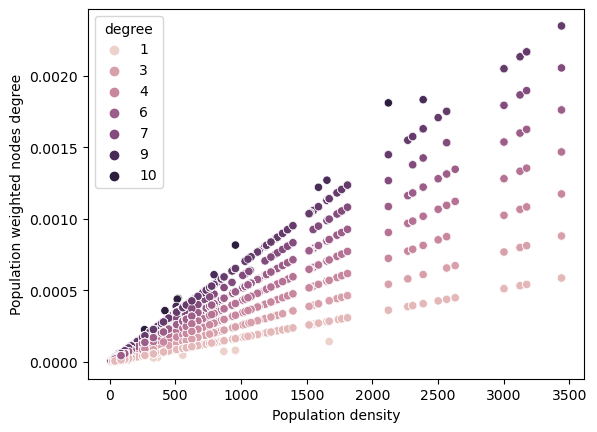

In [170]:
hues=pv_nodes_demog_joint['degree']

fig = sns.scatterplot(data=pv_nodes_demog_joint, x='population_density_psqkm', y='weighted_degree_popden', hue=hues) #size=sizes,
fig.set(xlabel='Population density', ylabel='Population weighted nodes degree')
plt.show()

In [140]:
# Log transformation of population_density_psqkm
pv_nodes_demog_joint['log_weighted_degree_popden']=np.log(pv_nodes_demog_joint['weighted_degree_popden'])

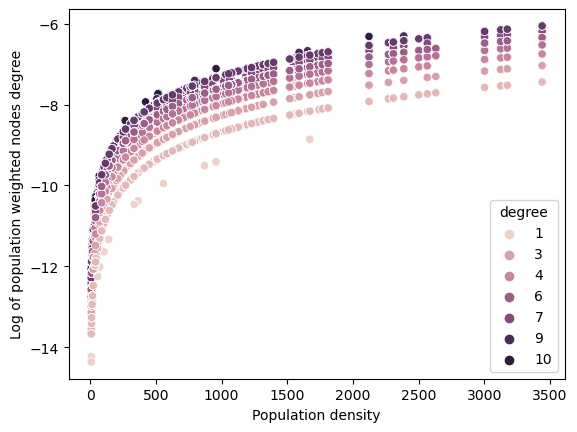

In [143]:
hues=pv_nodes_demog_joint['degree']

fig = sns.scatterplot(data=pv_nodes_demog_joint, x='population_density_psqkm', y='log_weighted_degree_popden', hue=hues) #size=sizes,
fig.set(xlabel='Population density', ylabel='Log of population weighted nodes degree')
plt.show()

In [146]:
pv_nodes_demog_joint.columns

Index(['osmid', 'y', 'x', 'street_count', 'highway', 'ref', 'geometry',
       'degree', 'index_right', 'GEOID', 'B01001_001E', 'B01002_001E',
       'B19025A_001E', 'NAME', 'state', 'county', 'tract',
       'population_density_psqkm', 'income_weight', 'population_weight',
       'weighted_degree_popden', 'weighted_degree_income',
       'log_weighted_degree_popden'],
      dtype='object')

In [147]:
pv_nodes_demog_joint['population_weight']

0        6.568852e-07
1        6.568852e-07
2        6.568852e-07
3        6.568852e-07
4        6.568852e-07
             ...     
26815    7.391990e-06
26887    7.391990e-06
26938    7.391990e-06
27003    7.391990e-06
27004    7.391990e-06
Name: population_weight, Length: 22381, dtype: float64

In [ ]:
hues=pv_nodes_demog_joint['degree']

fig = sns.scatterplot(data=pv_nodes_demog_joint, x='population_density_psqkm'*1000, y='weighted_degree_popden', hue=hues) #size=sizes,
fig.set(xlabel='Population density', ylabel='Log of population weighted nodes degree')
plt.show()

In [150]:
pv_nodes_demog_joint.columns

Index(['osmid', 'y', 'x', 'street_count', 'highway', 'ref', 'geometry',
       'degree', 'index_right', 'GEOID', 'B01001_001E', 'B01002_001E',
       'B19025A_001E', 'NAME', 'state', 'county', 'tract',
       'population_density_psqkm', 'income_weight', 'population_weight',
       'weighted_degree_popden', 'weighted_degree_income',
       'log_weighted_degree_popden'],
      dtype='object')

In [151]:
pv_nodes_demog_joint['population_weight']

0        6.568852e-07
1        6.568852e-07
2        6.568852e-07
3        6.568852e-07
4        6.568852e-07
             ...     
26815    7.391990e-06
26887    7.391990e-06
26938    7.391990e-06
27003    7.391990e-06
27004    7.391990e-06
Name: population_weight, Length: 22381, dtype: float64

<AxesSubplot: >

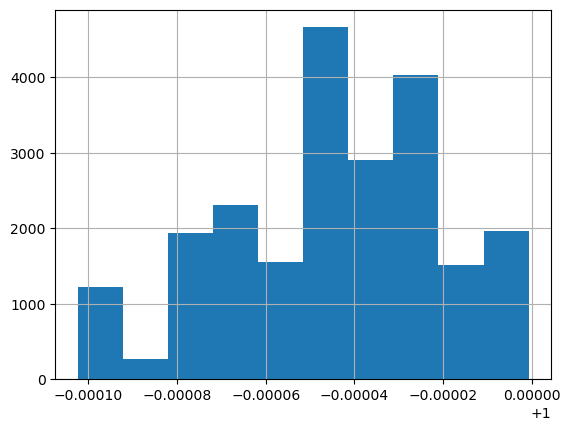

In [159]:
pv_nodes_demog_joint['income_weight'].hist()

In [162]:
pv_nodes_demog_joint['income_weight'].min()

0.9998976220616848

In [149]:
pv_nodes_centrality_demog_joint

osmid          y          x  street_count highway  ref  \
0         61729156  42.079644 -72.887030             2     NaN  NaN   
1         61729157  42.055242 -72.889788             2     NaN  NaN   
2         61729158  42.082428 -72.907965             2     NaN  NaN   
3         61729160  42.060554 -72.970758             2     NaN  NaN   
4         61729162  42.066328 -72.861139             3     NaN  NaN   
...            ...        ...        ...           ...     ...  ...   
446247  9052974266  42.255386 -72.577068             2     NaN  NaN   
446248  9052974269  42.255414 -72.577196             2     NaN  NaN   
446822  9055332842  42.253248 -72.571415             2     NaN  NaN   
448397  9085401465  42.255090 -72.576887             2     NaN  NaN   
448398  9085401472  42.255604 -72.578046             2     NaN  NaN   

                                geometry  eigenvector_centrality  index_right  \
0       POINT (-8113747.065 5172917.205)            5.303709e-09           72   
1       POINT (-8114054.084 5169258.023)            8.125665e-09           72   
2       POINT (-8116077.539 5173334.767)            5.421254e-09           72   
3       POINT (-8123067.623 5170054.460)            3.909797e-08           72   
4       POINT (-8110864.914 5170920.181)            2.961475e-07           72   
...                                  ...                     ...          ...   
446247  POINT (-8079242.298 5199312.144)            3.943810e-07           42   
446248  POINT (-8079256.457 5199316.265)            3.077825e-07           42   
446822  POINT (-8078612.997 5198990.654)            3.802130e-08           42   
448397  POINT (-8079222.049 5199267.550)            9.514208e-07           42   
448398  POINT (-8079351.101 5199344.901)            4.417285e-07           42   

              GEOID  ...  B19025A_001E  \
0       25013813000  ...   237961500.0   
1       25013813000  ...   237961500.0   
2       25013813000  ...   237961500.0   
3       25013813000  ...   237961500.0   
4       25013813000  ...   237961500.0   
...             ...  ...           ...   
446247  25015821200  ...     7440500.0   
446248  25015821200  ...     7440500.0   
446822  25015821200  ...     7440500.0   
448397  25015821200  ...     7440500.0   
448398  25015821200  ...     7440500.0   

                                                     NAME  state county  \
0        Census Tract 8130, Hampden County, Massachusetts     25    013   
1        Census Tract 8130, Hampden County, Massachusetts     25    013   
2        Census Tract 8130, Hampden County, Massachusetts     25    013   
3        Census Tract 8130, Hampden County, Massachusetts     25    013   
4        Census Tract 8130, Hampden County, Massachusetts     25    013   
...                                                   ...    ...    ...   
446247  Census Tract 8212, Hampshire County, Massachus...     25    015   
446248  Census Tract 8212, Hampshire County, Massachus...     25    015   
446822  Census Tract 8212, Hampshire County, Massachus...     25    015   
448397  Census Tract 8212, Hampshire County, Massachus...     25    015   
448398  Census Tract 8212, Hampshire County, Massachus...     25    015   

         tract population_density_psqkm income_weight  population_weight  \
0       813000                 7.698151      0.999995       8.072314e-08   
1       813000                 7.698151      0.999995       8.072314e-08   
2       813000                 7.698151      0.999995       8.072314e-08   
3       813000                 7.698151      0.999995       8.072314e-08   
4       813000                 7.698151      0.999995       8.072314e-08   
...        ...                      ...           ...                ...   
446247  821200              1052.850844      1.000000       1.104024e-05   
446248  821200              1052.850844      1.000000       1.104024e-05   
446822  821200              1052.850844      1.000000       1.104024e-05   
448397  821200       